In [35]:
# News Mood
# Dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import seaborn as sns
import numpy as np

# Import and initialize sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
# Twitter API keys
from config import (consumer_key,
                   consumer_secret,
                   access_token,
                   access_token_secret)

# Setup tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [37]:
# Set up users
bbc = "@BBC"
cbs = "@CBS"
cnn = "@CNN"
fox = "@FoxNews"
nyt = "@nytimes"

In [38]:
# BBC
# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(bbc, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        bbc_compound = results["compound"]
        bbc_pos = results["pos"]
        bbc_neu = results["neu"]
        bbc_neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
        # Add sentiments for each tweet into a list
        bbc_sentiments.append({"Date" : tweet["created_at"],
                          "Compound" : bbc_compound,
                          "Positive" : bbc_pos,
                          "Negative" : bbc_neg,
                          "Neutral" : bbc_neu,
                          "Tweets Ago" : counter,
                              "Tweet Text" : tweet["text"],
                              "Tweet URL" : tweet["user"]["url"]})
        
        # Add to counter
        counter += 1

In [39]:
# Convert sentiments to DataFrame
bbc_pd = pd.DataFrame.from_dict(bbc_sentiments)
bbc_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweet URL,Tweets Ago
0,-0.6369,Sat Apr 28 20:01:07 +0000 2018,0.25,0.652,0.098,A crisis of plastic waste in Indonesia has bec...,http://t.co/9Yv7DJ1Pmu,1
1,0.7650,Sat Apr 28 19:06:03 +0000 2018,0.00,0.680,0.320,❤️ This make-up artist is using her skills to ...,http://t.co/9Yv7DJ1Pmu,2
2,0.0000,Sat Apr 28 18:01:06 +0000 2018,0.00,1.000,0.000,The UK's obesity rates have more than trebled ...,http://t.co/9Yv7DJ1Pmu,3
3,0.5994,Sat Apr 28 17:02:00 +0000 2018,0.00,0.786,0.214,🤖📸 @TWBBC have created a chatbot that can pred...,http://t.co/9Yv7DJ1Pmu,4
4,0.0000,Sat Apr 28 16:29:48 +0000 2018,0.00,1.000,0.000,RT @BBCOne: It turns out Tamsin Greig has had ...,http://t.co/9Yv7DJ1Pmu,5


In [40]:
# Find the sum for the compound sentiment
bbc_pd["Compound"].sum()

0.6920000000000003

In [41]:
# Create variables for plot
x_bbc = bbc_pd["Tweets Ago"]
y_bbc = bbc_pd["Compound"]

In [42]:
# CBS
# Counter
counter = 1

# Variables for holding sentiments
cbs_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(cbs, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        cbs_compound = results["compound"]
        cbs_pos = results["pos"]
        cbs_neu = results["neu"]
        cbs_neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
        # Add sentiments for each tweet into a list
        cbs_sentiments.append({"Date" : tweet["created_at"],
                          "Compound" : cbs_compound,
                          "Positive" : cbs_pos,
                          "Negative" : cbs_neg,
                          "Neutral" : cbs_neu,
                          "Tweets Ago" : counter,
                               "Tweet Text" : tweet["text"],
                              "Tweet URL" : tweet["user"]["url"]})
        
        # Add to counter
        counter += 1

In [43]:
# Convert sentiments to DataFrame
cbs_pd = pd.DataFrame.from_dict(cbs_sentiments)
cbs_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweet URL,Tweets Ago
0,0.0000,Thu Apr 26 23:40:24 +0000 2018,0.0,1.000,0.000,These stars are going undercover for #Celebrit...,https://t.co/pv1oxSnkdj,1
1,0.7500,Wed Apr 25 21:48:49 +0000 2018,0.0,0.687,0.313,New courage. New hope. New season. \n\nSeason ...,https://t.co/pv1oxSnkdj,2
2,0.5719,Wed Apr 25 18:09:50 +0000 2018,0.0,0.837,0.163,Celebrate #DNADay by letting your forensic fla...,https://t.co/pv1oxSnkdj,3
3,0.6239,Wed Apr 25 16:55:33 +0000 2018,0.0,0.779,0.221,"Get ready for big reveals, dramatic conclusion...",https://t.co/pv1oxSnkdj,4
4,0.6696,Mon Apr 23 21:03:22 +0000 2018,0.0,0.756,0.244,Who’s ready to see these moves? 🕺 Tune in to t...,https://t.co/pv1oxSnkdj,5


In [44]:
# Create variables for plots
x_cbs = cbs_pd["Tweets Ago"]
y_cbs = cbs_pd["Compound"]

In [45]:
# Find the sum for the compound sentiment
cbs_pd["Compound"].sum()

39.0884

In [46]:
# CNN
# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(cnn, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        cnn_compound = results["compound"]
        cnn_pos = results["pos"]
        cnn_neu = results["neu"]
        cnn_neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
        # Add sentiments for each tweet into a list
        cnn_sentiments.append({"Date" : tweet["created_at"],
                          "Compound" : cnn_compound,
                          "Positive" : cnn_pos,
                          "Negative" : cnn_neg,
                          "Neutral" : cnn_neu,
                          "Tweets Ago" : counter,
                               "Tweet Text" : tweet["text"],
                              "Tweet URL" : tweet["user"]["url"]})
        
        
        # Add to counter
        counter += 1

In [47]:
# Convert sentiments to DataFrame
cnn_pd = pd.DataFrame.from_dict(cnn_sentiments)
cnn_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweet URL,Tweets Ago
0,0.4939,Sat Apr 28 22:00:03 +0000 2018,0.000,0.802,0.198,Alfie's Army rallies behind his family and rel...,http://t.co/IaghNW8Xm2,1
1,-0.7430,Sat Apr 28 21:45:06 +0000 2018,0.333,0.597,0.070,Thousands protest after men are cleared of rap...,http://t.co/IaghNW8Xm2,2
2,0.5574,Sat Apr 28 21:30:08 +0000 2018,0.142,0.526,0.332,Joy Reid apologizes and says experts haven't p...,http://t.co/IaghNW8Xm2,3
3,0.0000,Sat Apr 28 21:15:07 +0000 2018,0.000,1.000,0.000,"British supermarket chain Sainsbury's in ""adva...",http://t.co/IaghNW8Xm2,4
4,0.0000,Sat Apr 28 21:00:08 +0000 2018,0.000,1.000,0.000,President Trump to skip White House Correspond...,http://t.co/IaghNW8Xm2,5


In [48]:
# Create variables for plots
x_cnn = cnn_pd["Tweets Ago"]
y_cnn = cnn_pd["Compound"]

In [49]:
# Find the sum for the compound sentiment
cnn_pd["Compound"].sum()

-2.1309

In [50]:
# FOX
# Counter
counter = 1

# Variables for holding sentiments
fox_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(fox, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        fox_compound = results["compound"]
        fox_pos = results["pos"]
        fox_neu = results["neu"]
        fox_neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
        # Add sentiments for each tweet into a list
        fox_sentiments.append({"Date" : tweet["created_at"],
                          "Compound" : fox_compound,
                          "Positive" : fox_pos,
                          "Negative" : fox_neg,
                          "Neutral" : fox_neu,
                          "Tweets Ago" : counter,
                               "Tweet Text" : tweet["text"],
                              "Tweet URL" : tweet["user"]["url"]})
        
        # Add to counter
        counter += 1

In [51]:
# Convert sentiments to DataFrame
fox_pd = pd.DataFrame.from_dict(fox_sentiments)
fox_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweet URL,Tweets Ago
0,0.0000,Sat Apr 28 22:11:42 +0000 2018,0.000,1.000,0.0,President @realDonaldTrump is set to hold a ra...,http://t.co/ZYG58XZtAC,1
1,-0.8834,Sat Apr 28 22:09:33 +0000 2018,0.507,0.493,0.0,'Lost Their G--Damn Humanity': PBA President F...,http://t.co/ZYG58XZtAC,2
2,0.0000,Sat Apr 28 22:00:19 +0000 2018,0.000,1.000,0.0,Cow caught on video charging at Texas law enfo...,http://t.co/ZYG58XZtAC,3
3,0.0000,Sat Apr 28 21:50:13 +0000 2018,0.000,1.000,0.0,"John Park on Trump, Kim Jong Un discussing Ott...",http://t.co/ZYG58XZtAC,4
4,-0.5994,Sat Apr 28 21:48:50 +0000 2018,0.178,0.822,0.0,A woman holds balloons with photos of Alfie Ev...,http://t.co/ZYG58XZtAC,5


In [52]:
# Create variables for plots
x_fox = fox_pd["Tweets Ago"]
y_fox = fox_pd["Compound"]

In [53]:
# Find the sum for the compound sentiment
fox_pd["Compound"].sum()

-3.2859000000000007

In [54]:
# NYT
# Counter
counter = 1

# Variables for holding sentiments
nyt_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(nyt, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        nyt_compound = results["compound"]
        nyt_pos = results["pos"]
        nyt_neu = results["neu"]
        nyt_neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet["id"] - 1
        
        # Add sentiments for each tweet into a list
        nyt_sentiments.append({"Date" : tweet["created_at"],
                          "Compound" : nyt_compound,
                          "Positive" : nyt_pos,
                          "Negative" : nyt_neg,
                          "Neutral" : nyt_neu,
                          "Tweets Ago" : counter,
                               "Tweet Text" : tweet["text"],
                              "Tweet URL" : tweet["user"]["url"]})
        
        # Add to counter
        counter += 1

In [55]:
# Convert sentiments to DataFrame
nyt_pd = pd.DataFrame.from_dict(nyt_sentiments)
nyt_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweet URL,Tweets Ago
0,0.00,Sat Apr 28 22:06:17 +0000 2018,0.0,1.0,0.0,Stars Remember the Golden Age of New York Thea...,http://t.co/ahvuWqicF9,1
1,0.00,Sat Apr 28 22:03:00 +0000 2018,0.0,1.0,0.0,Doris Burke Has Game https://t.co/fgoRf3ynEa,http://t.co/ahvuWqicF9,2
2,0.00,Sat Apr 28 21:59:02 +0000 2018,0.0,1.0,0.0,Opinion: “Rich” is still a man’s word. She's t...,http://t.co/ahvuWqicF9,3
3,0.00,Sat Apr 28 21:45:08 +0000 2018,0.0,1.0,0.0,How to spend 36 hours in Copenhagen https://t....,http://t.co/ahvuWqicF9,4
4,0.25,Sat Apr 28 21:30:09 +0000 2018,0.0,0.9,0.1,An NYC burlesque troupe created a community wh...,http://t.co/ahvuWqicF9,5


In [56]:
# Create variables for plots
x_nyt = nyt_pd["Tweets Ago"]
y_nyt = nyt_pd["Compound"]

In [57]:
nyt_pd["Compound"].sum()

-5.544899999999999

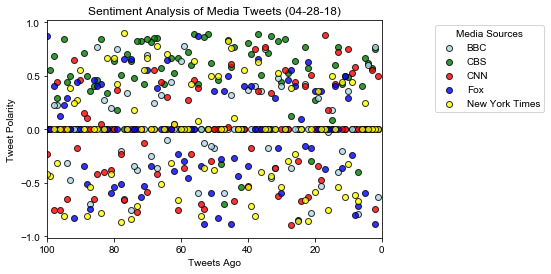

In [58]:
# Plot different news outlets on a scatter plot
cbs = plt.scatter(x_cbs, y_cbs, marker = "o", facecolors = "green", edgecolors = "black", alpha = 0.8)
bbc = plt.scatter(x_bbc, y_bbc, marker = "o", facecolors = "lightblue", edgecolors = "black", alpha = 0.8)
cnn = plt.scatter(x_cnn, y_cnn, marker = "o", facecolors = "red",  edgecolors = "black", alpha = 0.8)
fox = plt.scatter(x_fox, y_fox, marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.8)
nyt = plt.scatter(x_nyt, y_nyt, marker = "o", facecolors = "yellow", edgecolors = "black", alpha = 0.8)
# Use today's date for title
now = datetime.now()
today = now.strftime("%m-%d-%y")

# Add title and axes labels
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({today})")
plt.legend((bbc, cbs, cnn, fox, nyt), ("BBC", "CBS", "CNN", "Fox", "New York Times"), loc = 'upper right', bbox_to_anchor=(1.5,1), title = "Media Sources")

# Set ticks to match sample picture
plt.yticks(np.arange(-1,1.5,step=0.5))

# Reverse direction for the x axis
plt.xlim(100,0)
sns.set_style("darkgrid")
#plt.figure(figsize = (150,2))
plt.savefig("Sentiment_Analysis", bbox_inches="tight")



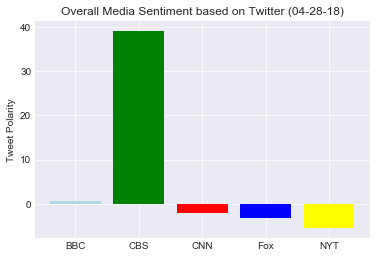

In [59]:
# Overall Sentiment
# Add the compound scores for each news source
bbc = plt.bar("BBC", bbc_pd["Compound"].sum(), color = "lightblue")
cbs = plt.bar("CBS", cbs_pd["Compound"].sum(), color = "green")
cnn = plt.bar("CNN", cnn_pd["Compound"].sum(), color = "red")
fox = plt.bar("Fox", fox_pd["Compound"].sum(), color = "blue")
nyt = plt.bar("NYT", nyt_pd["Compound"].sum(), color = "yellow")
plt.title(f"Overall Media Sentiment based on Twitter ({today})")
plt.ylabel(f"Tweet Polarity")
sns.set_style("dark")
plt.savefig("Overall_sentiment")

In [60]:
# Export file as a CSV... use data frames
pd.concat([bbc_pd, cbs_pd, cnn_pd, fox_pd, nyt_pd]).to_csv('news.csv')